# Modèles du Fake news

Sujet d'ARE DYNAMIC 2018 (Jenny Ogolo, Aya SADOUKI, Ruxue ZENG)

## Introduction

Considérons un ensemble donné d'**individus** que l'on appelera **population**. Chacun de ces individus possède une **opinion binaire** face à un fake news. Naturellement, nous pouvons nous attendre à ce que l'opinion d'un individu donné évolue en fonction des **rencontres** faites avec d'autres individus, par contact physique (que l'on appelle les **voisins** , ou à distance (qu'ils sont appartiennent dans un même **réseau**).

Dans ce contexte, une question émerge principalement :

* Comment évolueront les opinions des individus au cours du temps ?

Dans la première partie de cette modèle, nous allons étudier ce modèle en particulier : le **modèle du fake news par contact physique**. Ce modèle effectue les deux hypothèses suivantes :

* L'opinion d'un individu $ i $ est une valeur entier réel ( $ 0 $ ou $ 1 $ ), que nous noterons $ op_i $.

* chaque individu possède une conviction que nous notrerons $ p_i $ (une valeur réel comprise entre $ 0 $ et $ 1 $ inclus)

* Le premier mise à jour consiste à faire évoluer la conviction d'un individu $ i $, lorsqu'il rencontre un individu $ j $ (ou un groupe d'individus en fonction des trois paramètres:

    * l'influence de la force de persuasion $ fp_i $, caractéristique d"un individu, une valeur compris entre $ 0 $ et $ 1 $ inclus, $ p_i $ évolue lorsque $  fp_i $ < $  fp_j $ en appliquant la formule: $ p_i \leftarrow p_i + fp_i  \cdot ( p_j - p_i ) $
    * l'influence du voisinage en appliquant $ p_i \leftarrow p_i + fp_j \cdot ( p_j - p_i ) $  si la discussion a eu lieu qu'entre seulement **2 personnes**, sinon,chaque individu modifie sa conviction en fonction de la **moyenne pondérée  $MP$ des convictions des autres** ($ = \frac{\sum p_i*fp_i}{\sum fp_i} $) et la seuil de persuasion \sigma : si $ p_i < \sigma $, alors $ p_i \leftarrow MP $  .
    * la **crédibilité de la news $ c_news $ **: une valeur réel aléatoire comprise entre $ 0 $ et $ 1 $, influence $ p_i $ de façon suivante: $ p_i \leftarrow p_i + \lambda \cdot ( c - p_i ) $
    
* Le mise à jour de l'opinion consiste à faire évoluer l'opinion d'un individu en fonction de sa nouvelle conviction: if $ p_i  > 0.5 , $ $ op_i $ change. 


Où $ \lambda $ est appelé le **paramètre de la .....................**. Ce paramètre permet de contrôler la vitesse de convergence des opinions. Sa valeur est comprise entre $ 0 $ et $ 0.5 $.




## Initialisation

Nous initialisons une matrice de $ N*N $ individus, et un dictionaire qui associe à chaque individu un tuple sous la forme $ dict $ {$ i:(op,dejavu,fp,p) $}

In [124]:
import numpy as np

def init_systeme(N):
    """cet algorithme crée un groupe de population sous la forme d'une matrice de taille N, et un dictionnaire qui associe
    à chaque individu un tuple sous la forme dict{i:(op,dej_vu,fp,p)} où 
       op:opinion binaire de l'individu
       dej_vu: l'individu a déja vu ou pas le fake news
       fp: le pouvoir de persuasion de l'individu
       p:la conviction de l'individu """
    Population=np.arange(1,N*N+1).reshape(N,N)
    Dict_pop={str(i):(0,False,fp,0.5) for i in np.arange(1,N*N+1) 
        for fp in np.random.uniform(low=0.0, high=1.0, size=(N*N))}
        
    return Dict_pop


N_1dim=5
N=25
print("Nb_Pop=",N_1dim**2)
print("Dict_pop=",init_systeme(N_1dim))

Nb_Pop= 25
Dict_pop= {'1': (0, False, 0.40649332273338523, 0.5), '2': (0, False, 0.9980815060597354, 0.5), '3': (0, False, 0.8898874526350087, 0.5), '4': (0, False, 0.2488229063952333, 0.5), '5': (0, False, 0.0558157020462543, 0.5), '6': (0, False, 0.12348771085034316, 0.5), '7': (0, False, 0.14911214784910154, 0.5), '8': (0, False, 0.8776521885765007, 0.5), '9': (0, False, 0.26690797177143544, 0.5), '10': (0, False, 0.24050542203570058, 0.5), '11': (0, False, 0.6685303897610533, 0.5), '12': (0, False, 0.3693725256567467, 0.5), '13': (0, False, 0.7097068008273014, 0.5), '14': (0, False, 0.5246873815465273, 0.5), '15': (0, False, 0.4323027301711091, 0.5), '16': (0, False, 0.6946157700186864, 0.5), '17': (0, False, 0.8475227378779543, 0.5), '18': (0, False, 0.3255981974034008, 0.5), '19': (0, False, 0.7984237410607022, 0.5), '20': (0, False, 0.5050625146765456, 0.5), '21': (0, False, 0.3163349963039279, 0.5), '22': (0, False, 0.4481741251361676, 0.5), '23': (0, False, 0.43060758307201386

In [125]:
def init_sys_avec_malv(N_1dim):
    
    Pop=init_systeme(N_1dim)
    L= np.random.randint(low=0, high=N_1dim**2, size=6,dtype=int)
    for e in L:
        Pop[str(e)]=(1,True,0.9,0.8)
    
    return Pop

print("Pop_av_malv=",init_sys_avec_malv(N_1dim))
    

Pop_av_malv= {'1': (0, False, 0.3506250417115868, 0.5), '2': (0, False, 0.2563024107190197, 0.5), '3': (1, True, 0.9, 0.8), '4': (1, True, 0.9, 0.8), '5': (1, True, 0.9, 0.8), '6': (0, False, 0.29236680635497414, 0.5), '7': (0, False, 0.5015169089643362, 0.5), '8': (0, False, 0.8362948913473042, 0.5), '9': (0, False, 0.3849185226691034, 0.5), '10': (0, False, 0.25088938482365797, 0.5), '11': (0, False, 0.6378245723054321, 0.5), '12': (0, False, 0.9611324267280285, 0.5), '13': (1, True, 0.9, 0.8), '14': (0, False, 0.6831530967530507, 0.5), '15': (0, False, 0.9239821889861309, 0.5), '16': (1, True, 0.9, 0.8), '17': (0, False, 0.5566073486042309, 0.5), '18': (0, False, 0.33189067565621444, 0.5), '19': (0, False, 0.0407158518660794, 0.5), '20': (0, False, 0.6357040799274745, 0.5), '21': (0, False, 0.3868139421557498, 0.5), '22': (0, False, 0.782438261402482, 0.5), '23': (0, False, 0.20957092724871318, 0.5), '24': (1, True, 0.9, 0.8), '25': (0, False, 0.35245509313429135, 0.5)}


## Contact physique

### Influence de la force de persuasion

In [7]:
import numpy as np
Dict_pop=init_sys_avec_malv(N_1dim)


def force_de_persuasion(x, y, Dict_pop):
    """Rule to use to update the opinions."""
    
    #modification du paramètre fpx en fonction de la force de persuasion de y et vice versa.
    
    opx,dej_vux,fpx,px=Dict_pop[x]
    opy,dej_vuy,fpy,py=Dict_pop[y]
    if fpx>fpy:
        py=py+fpy*(px-py)
    elif fpy>fpx:
        px=px+fpx*(py-px)
                
    Dict_pop[x]=(opx,dej_vux,fpx,px)
    Dict_pop[y]=(opy,dej_vuy,fpy,py)
    
    return Dict_pop


### Selection voisinage d'un individu

In [51]:
def selection_voisinage(Matrice,i):
    '''Sélection des voisinages d'un individu
    '''
    Ma=[]
    n=1  #numéro de la ligne

    if (i-1)//N_1dim==0:
        Ma.append([0,0,0])
        
    for l in Matrice:
        if (n==(i//N_1dim) or n==(i//N_1dim+1) or n==(i//N_1dim+2)) and (i%N_1dim!=0):
                if (i%N_1dim!=1) and (i%N_1dim!=0):
                    Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
                elif (i%N_1dim==1):
                    Ma.append([0,l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
        elif (n==(i//N_1dim-1) or n==(i//N_1dim) or n==(i//N_1dim+1)) and (i%N_1dim==0):
            Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],0])
            n=n+1
            
        else:
            n=n+1
            
    if (i-1)//N_1dim==(N_1dim-1):
        Ma.append([0,0,0])
    
    A=np.mat(Ma)
    return A

Population=np.arange(1,(N+1)).reshape(N_1dim,N_1dim)
print(Population)
print(selection_voisinage(Population,23))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[17 18 19]
 [22 23 24]
 [ 0  0  0]]


**Influence de la crédibilité de la news sur p**

In [52]:
#numpy.random.choice(liste(ou entier) , taille de l'array , replace=False pour pas avoir deux fois la meme valeur , proba)

import numpy as np
import random as rd


news = np.random.random_sample()
print('Crédibilité de l\'info:',news)

def influ_credib_news(news,p):
    #news: crédibilité de la news
    #p: param déterminant le chgt ou non de l'opinion    
    i = p
    i = i+news*(news-i)
    return i

print(influ_credib_news(0.8,0.5))

Crédibilité de l'info: 0.4656940143781858
0.74


**Influence du voisinage sur p**

In [56]:
#Influence du voisinage :
    # si 2 personnes, force persu. Sinon, moyenne des p pondérée des fp, puis si (pi-moy)>seuil, pi ne change pas, sinon pi->moy
def influ_voisinage(mat_discu,reseau,seuil):
    
    P=[]   #liste des convictions des membres de la discussion
    F=[]   #liste des forces de persuasion des membres de la discussion
    N=[]   #liste des noms des membres de la discussion
    a_central=mat_discu[1,1] #agent central de la matrice discu
    i=0
    
    for k in np.nditer(mat_discu):
        if k!=0:
            op_k,deja_k,fp_k,p_k=reseau[str(k)]
            N.append(int(k))
            P.append(p_k)
            F.append(fp_k)
            
    if len(N)==2:
        reseau=force_persu(N[0],N[1],reseau)
    else:
        for a in N:
            op_a,deja_a,fp_a,p_a=reseau[str(a)]
            other_p=P[0:a]+P[a+1:len(P)]
            other_fp=F[0:a]+F[a+1:len(F)]            
            moy=np.average(other_p,weights=other_fp)
            if abs(p_a-moy)<seuil:
                p_a=moy
            reseau[str(a)]=(op_a,deja_a,fp_a,p_a)
    
            
    return reseau

#Réseau à valeurs quelconques (au milieu de la simulation par exemple)
Test_reseau={str(k):(np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(1,N+1)}

Mat_discu=selection_voisinage(Population,1)
print(influ_voisinage(Mat_discu,Test_reseau,0.2))

{'1': (1, True, 0.03995411170492369, 0.2596384135505943), '2': (1, False, 0.152678614358422, 0.557663974236126), '3': (1, True, 0.22207014782330836, 0.5651965255507644), '4': (0, False, 0.24972255988256153, 0.7719044952362586), '5': (0, True, 0.3763460465232831, 0.19641322577414688), '6': (0, True, 0.3153745823684072, 0.37216516972096925), '7': (1, False, 0.04685018817486286, 0.37216516972096925), '8': (1, True, 0.5299063178673084, 0.3364700318144028), '9': (1, True, 0.28845391474512305, 0.5412956301392867), '10': (1, True, 0.2309785477759395, 0.8661270250924337), '11': (0, False, 0.3367004062170198, 0.6455373010364475), '12': (0, False, 0.3366913450492752, 0.07206270054029507), '13': (1, True, 0.3876014217314816, 0.5824219840316488), '14': (1, True, 0.3203632922665617, 0.9797045483657458), '15': (0, False, 0.2702890518545972, 0.6610124310882267), '16': (1, True, 0.9994767594230257, 0.6220599969742885), '17': (0, False, 0.2697588037051917, 0.41794152712682153), '18': (1, True, 0.800227

In [132]:
Pop_av_malv=init_sys_avec_malv(N_1dim)
Pop_av_malv

{'1': (0, False, 0.018691707898032095, 0.5),
 '10': (0, False, 0.40748218851873697, 0.5),
 '11': (0, False, 0.7116244318626864, 0.5),
 '12': (0, False, 0.3540661415720493, 0.5),
 '13': (0, False, 0.1621265633900929, 0.5),
 '14': (0, False, 0.2818671900066272, 0.5),
 '15': (0, False, 0.5285184897628399, 0.5),
 '16': (0, False, 0.2803443947507408, 0.5),
 '17': (0, False, 0.10816901532427181, 0.5),
 '18': (0, False, 0.6996283353931461, 0.5),
 '19': (0, False, 0.31139755226977417, 0.5),
 '2': (0, False, 0.568049359865478, 0.5),
 '20': (1, True, 0.9, 0.8),
 '21': (0, False, 0.5195181928667572, 0.5),
 '22': (0, False, 0.4104808855276779, 0.5),
 '23': (0, False, 0.3164478295824976, 0.5),
 '24': (0, False, 0.07085219133256071, 0.5),
 '25': (0, False, 0.032286864580189145, 0.5),
 '3': (1, True, 0.9, 0.8),
 '4': (0, False, 0.5762941678787759, 0.5),
 '5': (1, True, 0.9, 0.8),
 '6': (0, False, 0.8813755852085234, 0.5),
 '7': (0, False, 0.5785592985689955, 0.5),
 '8': (0, False, 0.23945480643979766

### Simulation

In [133]:
def simulation(steps,N_1dim,seuil,reseau,verbose=False):
    """retourne la matrice Population et le dictionnaire d'après des étapes"""
    
    results=[]
    Pop=np.arange(1,N_1dim**2+1)
    Population=np.arange(1,N_1dim**2+1).reshape(N_1dim,N_1dim)
    Dict_pop={str(i):(0,False,fp,0.5) for i in np.arange(1,N**2+1) for fp in np.random.uniform(low=0.0, high=1.0, size=(N**2))}
    
    for simu in range(steps):
        i=np.random.choice(Pop)
        Mat_discu=selection_voisinage(Population,i)
        Res_p_changé=influ_voisinage(Mat_discu,reseau,seuil)
        for c in Res_p_changé:
            op,deja,fp,p=Res_p_changé[c]
            if p>0.5 and op==0:
                op=1
                Res_p_changé[c]=(op,deja,fp,p)
            elif p<0.5 and op==1:
                op=0
                Res_p_changé[c]=(op,deja,fp,p)
        Op=[]
        P=[]
        for e in Res_p_changé:
            op,deja,fp,p=Res_p_changé[e]
            Op.append(op)
            P.append(p)
        Op_final=np.reshape(Op, (N_1dim,N_1dim))
        P_final=np.reshape(P, (N_1dim,N_1dim))
        results.append(P_final.copy())
        
    return results

simulation(10,5,0.5,Pop_av_malv,verbose=True)
        
    

[array([[0.57020466, 0.5       , 0.57643156, 0.5       , 0.8       ],
        [0.57292718, 0.5665044 , 0.5635022 , 0.8       , 0.5       ],
        [0.56116973, 0.56116973, 0.56116973, 0.5       , 0.5       ],
        [0.5       , 0.5       , 0.5       , 0.5       , 0.8       ],
        [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]]),
 array([[0.57020466, 0.5       , 0.57643156, 0.5       , 0.8       ],
        [0.57292718, 0.5665044 , 0.58359304, 0.62755362, 0.62755362],
        [0.56116973, 0.56116973, 0.62755362, 0.62755362, 0.62755362],
        [0.5       , 0.5       , 0.62755362, 0.62755362, 0.62755362],
        [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]]),
 array([[0.57020466, 0.5       , 0.57643156, 0.5       , 0.8       ],
        [0.57292718, 0.5665044 , 0.58359304, 0.62755362, 0.62755362],
        [0.56116973, 0.56116973, 0.62755362, 0.62755362, 0.62755362],
        [0.5       , 0.5       , 0.60458978, 0.60458978, 0.60458978],
        [0.5    

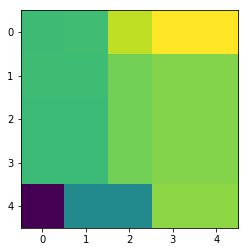

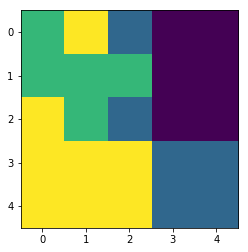

In [135]:
import matplotlib.pyplot as plt

fig = plt.figure()

results = simulation(1000,5,0.2,Pop_av_malv,verbose=True)

# results[i] contient l'état au pas de temps i sous forme de matrice
im = plt.imshow(results[0], animated=True)
plt.show()

im = plt.imshow(results[999], animated=True)
plt.show()



def updatefig(i):
    im.set_array(results[i+1])
    return im

#ani = animation.FuncAnimation(fig, updatefig, frames=1000, interval=50, blit=True)
#HTML(ani.to_html5_video())
# Pour sauvegarder la vidéo dans un fichier externe
# ani.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [213]:
import numpy as np
def b_u_o(px, py, N_1dim):
    L1= np.random.uniform(low=0.0, high=1.0, size=5)
    for i in np.random.choice(L1, size=1):
          for j in np.random.choice(L1, size=1):
                if i>j:
                    px=py+i*(px-py)
                elif j>i:
                    py=px+j*(py-px)
    return px, py


In [214]:
import numpy as np
import random

def une_étape(steps, verbose = False):
    N_1dim=5

    state = np.random.uniform(low=0.0, high=N_1dim, size=(N_1dim,N_1dim))
    results =[]
  
    for simu in range(steps):
        px = random.randint(0,N_1dim - 1)
        py = random.randint(0,N_1dim - 1)
        
        state[px],state[py] = b_u_o(state[px], state[py], N_1dim)
        results.append(state.copy())
        
        return results

une_étape(10, verbose = True)

[array([[0.35728436, 0.16064076, 1.61913412, 1.41398544, 3.98273933],
        [1.06795212, 1.74737129, 2.13691373, 0.19674878, 4.67517388],
        [0.63507902, 3.48005483, 4.7083843 , 4.67417327, 0.27862121],
        [0.69730195, 3.59706659, 3.73790011, 1.8600497 , 1.790766  ],
        [2.34678842, 2.72592348, 3.51656619, 3.11072389, 3.88651281]])]

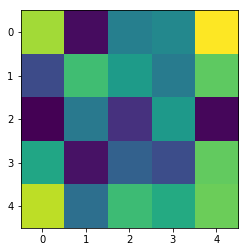

IndexError: list index out of range

In [215]:
import matplotlib.pyplot as plt

fig = plt.figure()

results = une_étape(1000,verbose=True)

# results[i] contient l'état au pas de temps i sous forme de matrice
im = plt.imshow(results[0], animated=True)
plt.show()

im = plt.imshow(results[999], animated=True)
plt.show()



def updatefig(i):
    im.set_array(results[i+1])
    return im


In [ ]:
definir degré de malveillance: nb de prsn malveillantes

In [ ]:
créer une fct qui montre ce qui se passe en une etape
si p individu !=0.5 alors deja_vu=True
prendre en compte influ voisinage
afficher en sortie la grille des p